# Distance Metric Analysis

In this section, we explore the statistical relationships between two sets of financial asset prices using various distance metrics. We aim to quantify the mutual information, which reflects the amount of information shared between the two asset price series, indicating potential correlations or dependencies. 

## Import Dependencies

In [2]:
import RiskLabAI.data.distance.distance_metric as dm
from sklearn.metrics import mutual_info_score

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as ss
import yfinance as yf
import numpy as np

## Setup and Data Retrieval

First, we import necessary Python libraries for data manipulation, statistical analysis, and visualization. We then retrieve historical closing prices for AAPL and TSLA starting from January 1st, 2020, using the yfinance library.

In [3]:
# Retrieve historical closing prices
x = yf.Ticker("AAPL").history(start="2020-01-01")['Close']
y = yf.Ticker("TSLA").history(start="2020-01-01")['Close']

## Calculating Distance Metrics

We compute several key statistics to measure the relationship between the two stock prices:

* **Joint Histogram**: Calculated to represent the bivariate distribution of AAPL and TSLA closing prices.
* **Marginal Entropies**: Entropies of AAPL and TSLA which measure the uncertainty or the amount of information contained in each stock's closing prices.
* **Mutual Information and Normalized Mutual Information**: These metrics help quantify the amount of shared information between AAPL and TSLA.
* **Conditional Entropies**: These measure the amount of information required to describe one stock given the other.

In [5]:
# Compute bivariate and marginal distributions
cXY = np.histogram2d(x, y)[0]
hX = ss.entropy(np.histogram(x)[0])  # Marginal entropy for AAPL
hY = ss.entropy(np.histogram(y)[0])  # Marginal entropy for TSLA

# Calculate mutual information
iXY = mutual_info_score(None, None, contingency=cXY)
iXYn = iXY / min(hX, hY)  # Normalized mutual information

# Calculate joint and conditional entropies
hXY = hX + hY - iXY  # Joint entropy
hX_Y = hXY - hY  # Conditional entropy of AAPL given TSLA
hY_X = hXY - hX  # Conditional entropy of TSLA given AAPL

## Variation of Information Analysis

In this section, we calculate two measures: the Variation of Information (VI) and the Extended Variation of Information (EVI) between two financial asset price series. These measures quantify the amount of information that one random variable loses when it is used to approximate another random variable, which is particularly useful for understanding the shared information and the unique information of each series.

### Variation of Information (VI)

The VI is calculated directly from the mutual information and the entropies of the data series.

In [7]:
# Calculate VI
vi_result = dm.calculate_variation_of_information(x, y, bins=10, norm=True)
vi_result

0.7987384377485486

### Extended Variation of Information (EVI)

The EVI adjusts the calculation based on a dynamically determined number of bins, taking into account the correlation between the two series.

In [8]:
# Calculate EVI
evi_result = dm.calculate_variation_of_information_extended(x, y, norm=True)
evi_result

0.7896887143697188

## Analysis of Mutual Information and Correlation

This section effectively demonstrates how sensitivity to the underlying relationships between variables is crucial for applying and interpreting both correlation and mutual information. It underscores the importance of understanding data generation mechanisms when analyzing statistical dependencies or associations in data.

### Independency

In this section, we explore the relationship between two generated datasets: one being a set of normal random variables, and the other being entirely noise. Our objective is to calculate and analyze the mutual information and the correlation coefficient between these datasets. This analysis helps to demonstrate the utility of these metrics in understanding relationships in data that is otherwise random and uncorrelated.

#### Generating Data

We generate two sets of data: x, which is a normal distribution, and y, which is purely noise. This setup is designed to demonstrate a scenario where two datasets have no inherent dependency:

In [9]:
# Set the seed for reproducibility
size, seed = 5000, 0
np.random.seed(seed)

# Generate data
x = np.random.normal(size=size)
e = np.random.normal(size=size)
y = 0*x + e  # y is independent of x

#### Calculate Mutual Information and Correlation

We calculate the normalized mutual information (NMI) and the Pearson correlation coefficient to quantify the relationship between x and y. These metrics will highlight the lack of association between the two datasets:

In [10]:
# Calculate mutual information and correlation
nmi = dm.calculate_mutual_information(x, y, True)
corr = np.corrcoef(x, y)[0, 1]

# Output results
(corr, nmi)

(0.001496837406727644, 0.006764619108279091)

#### Plotting the Data

Here, we provide a scatter plot of x versus y to visually represent their relationship. The scatter plot will further confirm the statistical measures indicating no significant relationship. Before displaying the plot, expect to observe a scatter with no discernible pattern, reflecting the statistical independence of the two variables.

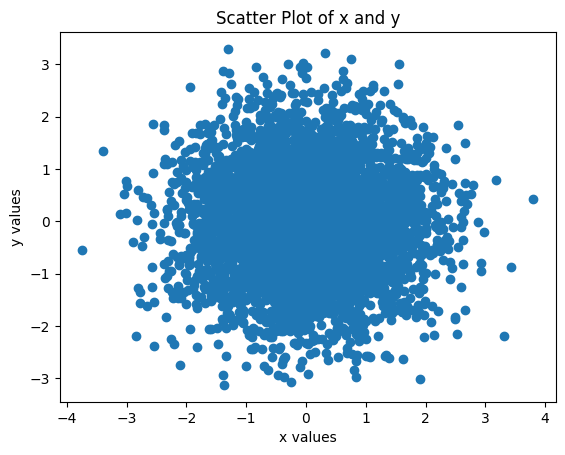

In [11]:
# Scatter plot of x and y
plt.scatter(x, y)
plt.title('Scatter Plot of x and y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

#### Analysis of Results

The plot and our calculated metrics:

* **Correlation (corr)**: Close to zero, indicating no linear relationship.
* **Normalized Mutual Information (nmi)**: : Also low, suggesting little to no shared information between x and y.

This demonstration highlights how mutual information and correlation provide insights into the lack of dependency in datasets where traditional methods might fail to capture the underlying dynamics.

### Linear dependency

In this analysis, we investigate the statistical relationships between two datasets, x and y, where y is generated with a strong linear dependency on x, adjusted by noise. Our aim is to quantify this relationship using both mutual information and correlation coefficients, which provide measures of linear and non-linear associations respectively.

#### Data Generation and Preliminary Calculations

The data is generated such that y depends linearly on x, scaled by a factor and added with Gaussian noise. This setup models a common scenario in financial and physical sciences where one variable is influenced predominantly by another, with some inherent randomness.

In [12]:
# Initialize random seed and generate data
size, seed = 5000, 0
np.random.seed(seed)
x = np.random.normal(size=size)
e = np.random.normal(size=size)
y = 10000 * x + e

# Calculate mutual information and correlation
nmi = dm.calculate_mutual_information(x, y, True)
corr = np.corrcoef(x, y)[0, 1]

# Output results
(corr, nmi)

(0.9999999949550481, 0.9949768013924747)

#### Visualization: Scatter Plot

Below is a scatter plot of x versus y. This visualization is expected to show a clear linear trend, illustrating the direct influence of x on y with some dispersion due to noise.

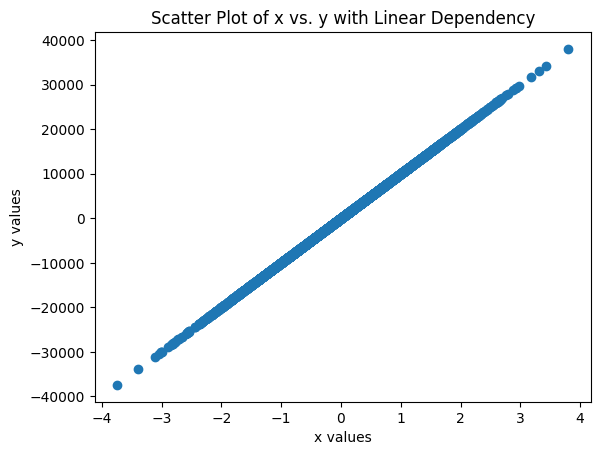

In [13]:
# Plotting the relationship between x and y
plt.scatter(x, y)
plt.title('Scatter Plot of x vs. y with Linear Dependency')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

#### Analysis of Results

The scatter plot demonstrates a pronounced linear relationship as anticipated. The correlation coefficient, which is nearly 1, and the mutual information, significantly higher than in scenarios with independent variables, both reflect this strong dependency.

### Non-linear dependency

This section explores the relationship between two datasets, x and y, where y is constructed with a nonlinear dependency on the absolute values of x, combined with additive Gaussian noise. We assess this relationship using mutual information, which captures non-linear dependencies, and Pearson's correlation coefficient, which is typically sensitive only to linear relationships.

#### Data Generation and Preliminary Calculations

We simulate data where y is derived from the absolute value of x, thereby introducing a non-linear relationship. This type of dependency often occurs in real-world scenarios where effects increase with the magnitude of input variables, regardless of their sign.

In [14]:
# Initialize random seed and generate data
size, seed = 5000, 0
np.random.seed(seed)
x = np.random.normal(size=size)
e = np.random.normal(size=size)
y = 10000 * abs(x) + e

# Calculate mutual information and correlation
nmi = dm.calculate_mutual_information(x, y, True)
corr = np.corrcoef(x, y)[0, 1]

# Output results
(corr, nmi)

(-0.007989423072464804, 0.6456262346759295)

#### Visualization: Scatter Plot

Below, we present a scatter plot of x versus y. Given the non-linear relationship involving the absolute values of x, we expect the plot to illustrate a V-shaped pattern, indicative of the non-linear model.

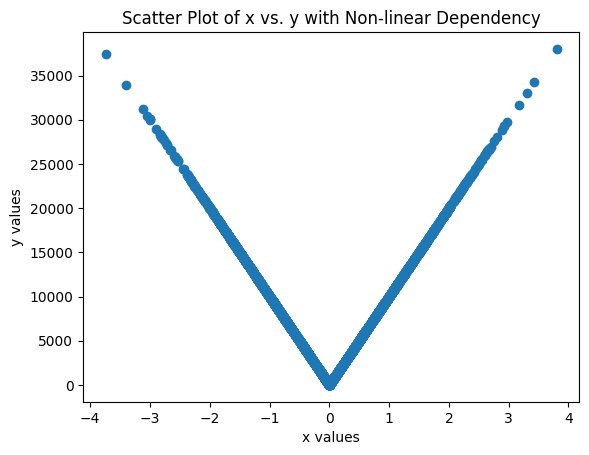

In [15]:
# Plotting the relationship between x and y
plt.scatter(x, y)
plt.title('Scatter Plot of x vs. y with Non-linear Dependency')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

#### Analysis of Results

The scatter plot clearly exhibits a V-shaped distribution, confirming the non-linear dependency formulated in the data generation process. Analyzing the outcomes:

* **Correlation (corr)**: The correlation coefficient likely remains low, suggesting little to no linear correlation between x and y. This is expected due to the symmetry and non-linear nature of the relationship.

* **Normalized Mutual Information (nmi)**: The mutual information is notably higher than what would be expected under independence, indicating that significant information about the magnitude of x is encoded in y, despite the non-linear transformation.

These findings underscore the limitations of Pearson's correlation in detecting non-linear relationships and highlight the utility of mutual information in capturing dependencies that traditional linear metrics may overlook. 